# Проведение парсинга и очистка данных. Перевод всех параметров в числовой формат и просмотр корреляции.


In [1]:
import matplotlib.pyplot as plt # matplotlib для графиков
import seaborn as sns # seaborn для графиков
import numpy as np    # Нампай для массивов
import pandas as pd   # Пандас для данных
import re             # Регулярные выражения
from tensorflow.keras import utils # Для приведения к категориальным данным
from google.colab import files     # Загрузка файлов

In [2]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Загружаем базу
df = pd.read_csv('/content/dataset1.csv')
df

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [5]:
df = df.reset_index(drop = True) # Переназначем индекс с удалением предыдущего индекса
df # Смотрим результат


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [7]:
df.count()


id_ответа                                                   248832
Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  24

In [8]:
df.nunique()


id_ответа                                                   248832
Раса                                                             3
Пол                                                              2
Возраст                                                          2
Статус курения                                                   3
ECOG                                                             2
Есть опухолевая нагрузка? (симптомная опухоль)                   2
Ко-мутации KRAS                                                  2
Ко-мутации p53.                                                  2
Ко-мутации STK11                                                 2
Ко-мутации KEAP1                                                 2
Срок от окончания ХЛТ                                            3
Молекулярный статус (только для неплоскоклеточного рака)         6
PD-L1 статус                                                     3
Предпочтение пациента по ответу на терапию                    

### узнаем какие уникальные значения имеются в каждом столбце


In [9]:
for name, values in df.items():
  print(name, ":", df[name].unique())

id_ответа : [     1      2      3 ... 248830 248831 248832]
Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектини

** Удаляем столбцы "id_ответа"

In [10]:
del df['id_ответа'] # Удаляем "id_ответа"

In [11]:
df # Смотрим результат

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


## Приводим данные к категориальным

In [22]:
df['Раса'] = df['Раса'].replace({'Другая': 0, 'Азиатская': 1, 'Европейская': 2})
df['Пол'] = df['Пол'].replace({' Женский': 0, ' Мужской': 1})
df['Возраст'] = df['Возраст'].replace({' До 70': 0, ' >70': 1})
df['Статус курения'] = df['Статус курения'].replace({' В настоящее время': 0, ' Курение в прошлом (бросил более 1 года)': 1, ' Курение в прошлом (бросил более 1 месяца до 1 года)': 2})
df['ECOG'] = df['ECOG'].replace({' 0-1': 0, '2': 1})
df['Есть опухолевая нагрузка? (симптомная опухоль)'] = df['Есть опухолевая нагрузка? (симптомная опухоль)'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KRAS'] = df['Ко-мутации KRAS'].replace({' да': 0, ' нет': 1})
df['Ко-мутации p53.'] = df['Ко-мутации p53.'].replace({' да': 0, ' нет': 1})
df['Ко-мутации STK11'] = df['Ко-мутации STK11'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KEAP1'] = df['Ко-мутации KEAP1'].replace({' да': 0, ' нет': 1})
df['Срок от окончания ХЛТ'] = df['Срок от окончания ХЛТ'].replace({'до 42 дней': 0, 'от 43 до 60 дней': 1, 'более 61 дня': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' ALK позитивный': 0, ' EGFR ex19': 1, ' EGFR ex21': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' EGFR редкий вариант': 3, ' не исследовались': 4, ' нет мутаций': 5})
df['PD-L1 статус'] = df['PD-L1 статус'].replace({' Более 1%': 0, ' Менее 1%': 1, ' Не исследовался': 2})
df['Предпочтение пациента по ответу на терапию'] = df['Предпочтение пациента по ответу на терапию'].replace({' Результативность лечения': 0, ' сохранение качества жизни': 1})
df['Ответ эксперта (Лактионов)'] = df['Ответ эксперта (Лактионов)'].replace({'Алектиниб': 0, 'Дурвалумаб': 1, 'Наблюдение': 2})


In [23]:
df


,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,1,0,0,0,1,1,1,1,1,0,5,2,0,1,True,False,False,0,0
1,1,1,0,0,0,1,1,1,1,1,1,5,2,0,1,True,False,False,0,0
2,1,1,0,0,0,1,1,1,1,1,2,5,2,0,2,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,1,1,0,0,0,1,1,1,1,1,0,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,1,1,0,0,0,1,1,1,1,1,1,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,0,1,1,1,0,0,0,0,0,1,2,0,1,2,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,0,0,1,1,1,0,0,0,0,0,2,2,0,1,2,True,False,False,0,0
248829,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Раса                                                      248832 non-null  int64 
 1   Пол                                                       248832 non-null  int64 
 2   Возраст                                                   248832 non-null  int64 
 3   Статус курения                                            248832 non-null  int64 
 4   ECOG                                                      248832 non-null  int64 
 5   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 6   Ко-мутации KRAS                                           248832 non-null  object
 7   Ко-мутации p53.                                           248832 non-null  object
 8   Ко-мутации STK

<ipython-input-26-adee93c01817>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr('spearman')


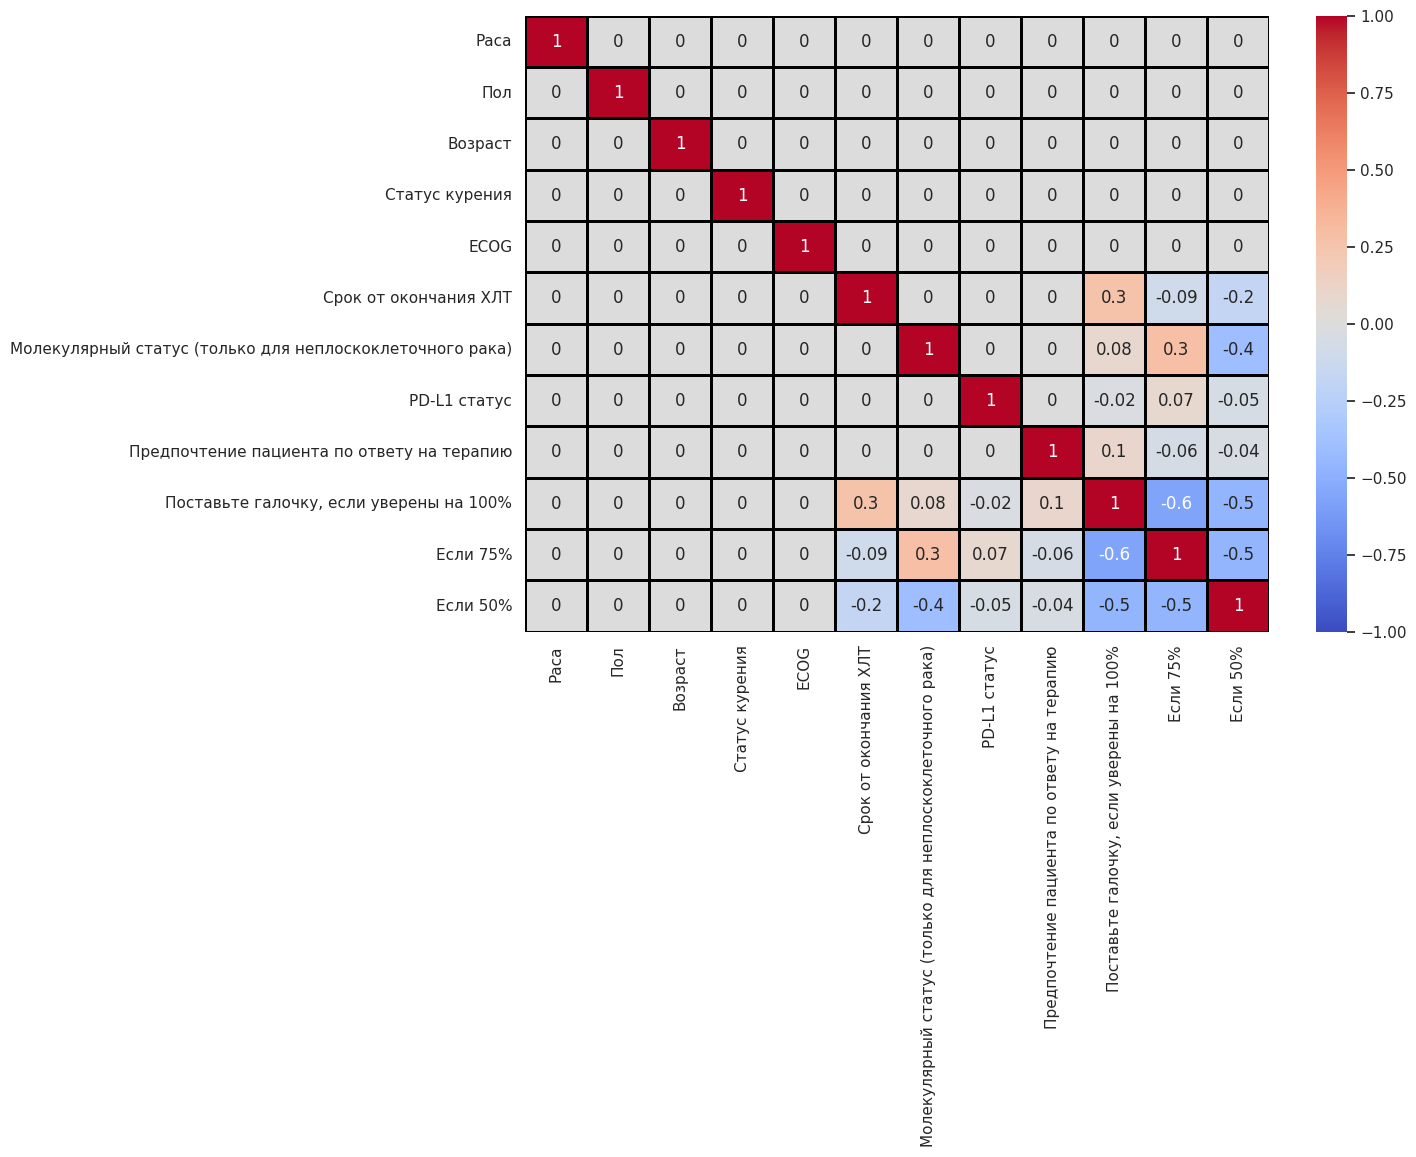

In [26]:
# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

sns.set(style='whitegrid', palette='muted')  # Включаем режим seaborn. Теперь даже методы от matplotlib будут отображаться в этом стиле.
                                             # whitegrid - белая сетка
                                             # muted - палитра для отображения

# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = df.corr('spearman')

# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')
plt.show()